In [85]:
# Importing tensorflow

import tensorflow as tf

In [86]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [87]:
# Loading CSV file

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [88]:
# No. of Rows and Columns

df.shape

(1338, 8)

In [89]:
# To check Null values

df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

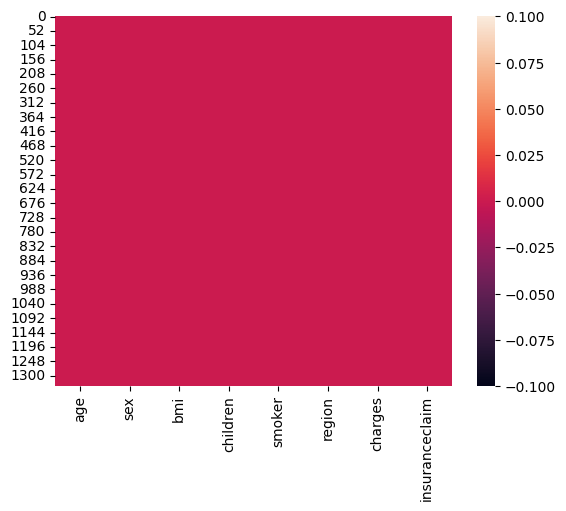

In [90]:
# Visualization for finding null values

sns.heatmap(df.isnull())
plt.show()

In [91]:
# To check every column is in numeric type

df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

In [92]:
# To check duplicate values/rows

df.duplicated().sum()

1

In [93]:
# Dropping duplicates

df.drop_duplicates(inplace = True)

In [94]:
# Select input and output (features and target)

x = df.drop('insuranceclaim',axis=1)
y = df['insuranceclaim']

In [95]:
# Splitting our data / Train Test Split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

In [96]:
# Apply Scaling

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [97]:
# Shape of x_train, x_test

x_train.shape,x_test.shape

((935, 7), (402, 7))

In [98]:
# Creating Neural Network

import tensorflow as tf

# Create the object of Sequential Class

model = tf.keras.Sequential([
    # First hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',input_shape=(x.shape[1],)),
    # Ouput Layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [99]:
# Summary of Model

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 64        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [100]:
# Compiling Model

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [101]:
# EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping

cb = EarlyStopping(
    monitor = 'val_loss',   # testing error
    min_delta = 0.00001,    # min value of delta
    patience = 20,
    verbose = 1,            # how many iterations
    mode = 'auto',          # stop at min loss
    baseline = None,
    restore_best_weights = False   # when the best weight and bias has found then stop the procedure
)

In [102]:
# Train model with 70% Data

trained_model = model.fit(x_train,y_train,epochs=5000,callbacks=cb,validation_data=(x_test,y_test))

Epoch 1/5000
30/30 [==============================] - 1s 7ms/step - loss: 0.5917 - accuracy: 0.6888 - val_loss: 0.5921 - val_accuracy: 0.6891
Epoch 2/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.5673 - accuracy: 0.7198 - val_loss: 0.5704 - val_accuracy: 0.7040
Epoch 3/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.5463 - accuracy: 0.7433 - val_loss: 0.5526 - val_accuracy: 0.7189
Epoch 4/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7679 - val_loss: 0.5372 - val_accuracy: 0.7338
Epoch 5/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.7754 - val_loss: 0.5241 - val_accuracy: 0.7537
Epoch 6/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.5014 - accuracy: 0.7818 - val_loss: 0.5123 - val_accuracy: 0.7637
Epoch 7/5000
30/30 [==============================] - 0s 4ms/step - loss: 0.4899 - accuracy: 0.7840 - val_loss: 0.5015 - val_accuracy: 0.7687
Epoch 

Our Model is not underfit because training loss is smaller then testing loss

And it is also not overfit because our training accuracy is some what same as testing accuracy

In [103]:
# Model Evaluation

print('Training_loss :',model.evaluate(x_train,y_train))
print('Testing_loss :',model.evaluate(x_test,y_test))

30/30 [==============================] - 0s 1ms/step - loss: 0.1808 - accuracy: 0.9348
Training_loss : [0.18078555166721344, 0.9347593784332275]
13/13 [==============================] - 0s 2ms/step - loss: 0.2584 - accuracy: 0.9080
Testing_loss : [0.25843632221221924, 0.9079601764678955]


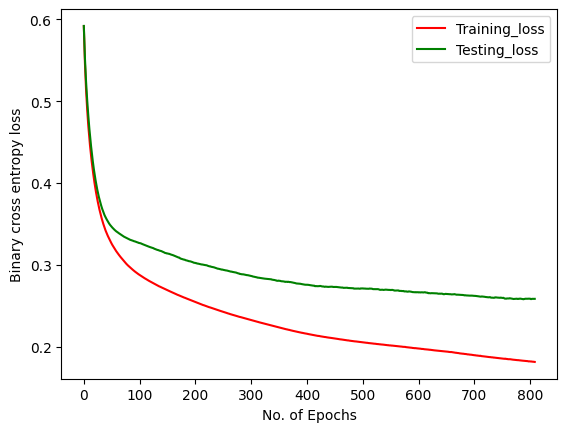

In [104]:
# Visualization for training and testing loss

plt.plot(trained_model.history['loss'],label='Training_loss',color='red')
plt.plot(trained_model.history['val_loss'],label='Testing_loss',color='green')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel('Binary cross entropy loss')
plt.show()

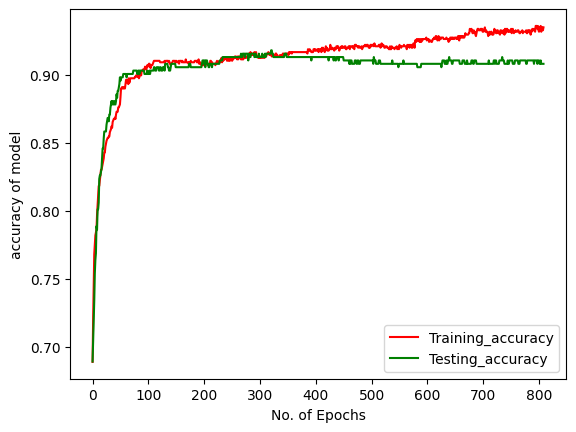

In [105]:
# Visualization for training and testing accuracy

plt.plot(trained_model.history['accuracy'],label='Training_accuracy',color='red')
plt.plot(trained_model.history['val_accuracy'],label='Testing_accuracy',color='green')
plt.legend()
plt.xlabel('No. of Epochs')
plt.ylabel('accuracy of model')
plt.show()

In [106]:
# To show weights and bias

model.get_weights()

[array([[ 0.6407746 , -1.4137647 , -1.487871  ,  0.08484569, -0.09364214,
         -0.33547932, -0.07681074, -0.20836666],
        [-0.09344096, -0.06539915,  0.13151482, -0.4275851 , -0.1924573 ,
          0.0899412 , -0.02031861, -0.30452877],
        [ 0.591912  , -0.34837532,  0.29955283,  0.59729695,  1.5410224 ,
         -0.26066923,  1.6784927 , -1.4881413 ],
        [-1.147138  , -1.7951369 ,  0.03745121, -0.7691587 ,  0.30809653,
         -0.09315701, -1.2993244 , -1.0917807 ],
        [ 1.2112757 ,  0.5012779 ,  0.24193801,  1.0086626 , -0.10136662,
          0.6146712 ,  0.5127183 , -0.18588544],
        [ 0.08008847, -0.13214843, -0.3191108 , -0.07300933,  0.21834132,
          0.5349922 ,  0.00494329,  0.17577061],
        [ 0.2520635 , -0.2989673 , -0.7506221 ,  0.09159537,  0.401707  ,
         -0.8232254 ,  0.05796915,  0.3297135 ]], dtype=float32),
 array([ 0.3306333 , -0.14622463,  0.7611641 ,  0.21689637,  0.20308566,
         0.05839581,  0.8970514 ,  0.21460082], d

In [107]:
# Testing the model

Y_pred = model.predict(x_test).round(2)

# Formula of prediction : Y_pred = 1/(1+np.exp(-x_test))

13/13 [==============================] - 0s 1ms/step


In [108]:
x_test

array([[ 0.3401095 , -1.05611771,  1.39588714, ...,  1.88117914,
        -0.48304777,  2.3934608 ],
       [ 1.27015023,  0.94686415,  0.15444973, ..., -0.53158148,
        -0.48304777, -0.18729799],
       [ 1.12706704, -1.05611771,  0.29769251, ..., -0.53158148,
        -1.38997482, -0.14439093],
       ...,
       [ 0.98398385,  0.94686415, -1.54435935, ..., -0.53158148,
         1.33080632, -0.29237275],
       [-1.30534716, -1.05611771, -0.70668229, ..., -0.53158148,
         1.33080632, -0.9016684 ],
       [-1.01918078,  0.94686415, -0.73683866, ..., -0.53158148,
        -1.38997482, -0.89158843]])

In [109]:
Y_pred

array([[1.  ],
       [1.  ],
       [0.98],
       [1.  ],
       [1.  ],
       [0.16],
       [1.  ],
       [0.52],
       [0.03],
       [0.82],
       [0.08],
       [0.08],
       [0.94],
       [0.15],
       [1.  ],
       [0.99],
       [0.15],
       [0.78],
       [0.84],
       [0.17],
       [0.99],
       [1.  ],
       [0.94],
       [0.15],
       [0.01],
       [1.  ],
       [0.17],
       [1.  ],
       [0.04],
       [0.43],
       [0.98],
       [0.61],
       [0.01],
       [0.52],
       [0.99],
       [0.81],
       [1.  ],
       [0.18],
       [0.59],
       [0.07],
       [0.88],
       [0.01],
       [0.38],
       [1.  ],
       [1.  ],
       [0.96],
       [0.08],
       [0.06],
       [0.01],
       [0.03],
       [1.  ],
       [0.34],
       [0.97],
       [0.02],
       [0.95],
       [0.1 ],
       [0.92],
       [1.  ],
       [0.09],
       [1.  ],
       [0.99],
       [1.  ],
       [0.98],
       [0.  ],
       [0.46],
       [0.01],
       [1.

So it takes all 7 inputs from the test data and finds the prob of claiming the insurance

x_test is the test data and Y_pred is the prob of claiming the insurance

In [110]:
# Applying prediction on the basis of above probability of Y_pred

Y_pred = np.where(Y_pred>=0.5,1,0)
Y_pred

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
    

In [111]:
# Generate Classification report and confusion matrix

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,Y_pred))
print(confusion_matrix(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       172
           1       0.94      0.90      0.92       230

    accuracy                           0.91       402
   macro avg       0.90      0.91      0.91       402
weighted avg       0.91      0.91      0.91       402

[[159  13]
 [ 24 206]]


# Checking if taking 2 hidden layers increases accuracy and decreses type 2 error

In [112]:
# Create the object of Sequential Class

model1 = tf.keras.Sequential([
    # First hidden layer
    tf.keras.layers.Dense(units=8,activation='relu',input_shape=(x.shape[1],)),
    # Second hidden layer
    tf.keras.layers.Dense(units=4,activation='relu'),
    # Ouput Layer
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [113]:
# Compiling Model

model1.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [114]:
# Train model with 70% Data

trained_model1 = model1.fit(x_train,y_train,epochs=5000,callbacks=cb,validation_data=(x_test,y_test))

Epoch 1/5000
30/30 [==============================] - 1s 8ms/step - loss: 0.7197 - accuracy: 0.4642 - val_loss: 0.7290 - val_accuracy: 0.4776
Epoch 2/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4898 - val_loss: 0.7082 - val_accuracy: 0.4925
Epoch 3/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.6732 - accuracy: 0.5422 - val_loss: 0.6929 - val_accuracy: 0.5199
Epoch 4/5000
30/30 [==============================] - 0s 4ms/step - loss: 0.6580 - accuracy: 0.5594 - val_loss: 0.6800 - val_accuracy: 0.5348
Epoch 5/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.6454 - accuracy: 0.5765 - val_loss: 0.6691 - val_accuracy: 0.5423
Epoch 6/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.5893 - val_loss: 0.6597 - val_accuracy: 0.5522
Epoch 7/5000
30/30 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.5947 - val_loss: 0.6508 - val_accuracy: 0.5721
Epoch 

# But Now our model is overfitting by increasing the hidden layer so we keep our hidden layer to 1 only

# We can always check our accuracy increases or not by adding hidden layers but once it overfits then understand that our first sequential model with 1 hidden layer was best